In [3]:
import netCDF4 as nc
from netCDF4 import num2date,date2index
import datetime
import csv
import numpy as np
import pandas as pd
import xarray as xr
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

In [4]:
data = nc.Dataset('GPH200.nc')

In [5]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)
    Conventions: COARDS
    description:  Data from NCEP initialized reanalysis (4x/day).  These are interpolated to pressure surfaces from model (sigma) surfaces.
    platform: Model
    NCO: 20121012
    title: monthly mean hgt from the NCEP Reanalysis
    dataset_title: NCEP-NCAR Reanalysis 1
    References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.html
    CDO: Climate Data Operators version 1.9.10 (https://mpimet.mpg.de/cdo)
    history: 15-Jun-2023 00:05:54 Subset NOAA/PSL  
    dimensions(sizes): time(732), lon(144), lat(73), level(1)
    variables(dimensions): float64 time(time), float32 lon(lon), float32 lat(lat), float32 level(level), float32 hgt(time, level, lat, lon)
    groups: 

In [6]:
hgt = data.variables['hgt']
print(hgt)

<class 'netCDF4._netCDF4.Variable'>
float32 hgt(time, level, lat, lon)
    long_name: Monthly mean geopotential height
    units: m
    _FillValue: -9.96921e+36
    missing_value: -9.96921e+36
    precision: 0
    least_significant_digit: 0
    GRIB_id: 7
    GRIB_name: HGT
    var_desc: Geopotential height
    level_desc: Pressure Levels
    statistic: Mean
    parent_stat: Other
    dataset: NCEP Reanalysis Derived Products
    actual_range: [ -354.45834 32321.098  ]
unlimited dimensions: time
current shape = (732, 1, 73, 144)
filling off


In [7]:
hgt[:]

masked_array(
  data=[[[[10866.097 , 10866.097 , 10866.097 , ..., 10866.097 ,
           10866.097 , 10866.097 ],
          [10863.871 , 10865.    , 10865.968 , ..., 10860.807 ,
           10861.807 , 10862.871 ],
          [10870.581 , 10872.839 , 10875.129 , ..., 10863.742 ,
           10866.129 , 10868.29  ],
          ...,
          [11334.549 , 11334.968 , 11335.29  , ..., 11333.678 ,
           11333.968 , 11334.193 ],
          [11343.483 , 11343.3545, 11343.483 , ..., 11343.581 ,
           11343.517 , 11343.517 ],
          [11362.678 , 11362.678 , 11362.678 , ..., 11362.678 ,
           11362.678 , 11362.678 ]]],


        [[[10879.207 , 10879.207 , 10879.207 , ..., 10879.207 ,
           10879.207 , 10879.207 ],
          [10899.896 , 10901.275 , 10902.759 , ..., 10895.207 ,
           10896.689 , 10898.345 ],
          [10933.482 , 10936.621 , 10939.689 , ..., 10923.759 ,
           10926.931 , 10930.138 ],
          ...,
          [11175.793 , 11174.725 , 11173.655 , ..., 

In [8]:
latitude = data.variables['lat']
print(latitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    axis: Y
    actual_range: [ 90. -90.]
unlimited dimensions: 
current shape = (73,)
filling off


In [9]:
latitude[:]

masked_array(data=[ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,
                    70. ,  67.5,  65. ,  62.5,  60. ,  57.5,  55. ,  52.5,
                    50. ,  47.5,  45. ,  42.5,  40. ,  37.5,  35. ,  32.5,
                    30. ,  27.5,  25. ,  22.5,  20. ,  17.5,  15. ,  12.5,
                    10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
                   -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5,
                   -30. , -32.5, -35. , -37.5, -40. , -42.5, -45. , -47.5,
                   -50. , -52.5, -55. , -57.5, -60. , -62.5, -65. , -67.5,
                   -70. , -72.5, -75. , -77.5, -80. , -82.5, -85. , -87.5,
                   -90. ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [10]:
longitude = data.variables['lon']
print(longitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    axis: X
    actual_range: [  0.  357.5]
unlimited dimensions: 
current shape = (144,)
filling off


In [11]:
longitude[:]

masked_array(data=[  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,
                    20. ,  22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,
                    40. ,  42.5,  45. ,  47.5,  50. ,  52.5,  55. ,  57.5,
                    60. ,  62.5,  65. ,  67.5,  70. ,  72.5,  75. ,  77.5,
                    80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
                   100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5,
                   120. , 122.5, 125. , 127.5, 130. , 132.5, 135. , 137.5,
                   140. , 142.5, 145. , 147.5, 150. , 152.5, 155. , 157.5,
                   160. , 162.5, 165. , 167.5, 170. , 172.5, 175. , 177.5,
                   180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
                   200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5,
                   220. , 222.5, 225. , 227.5, 230. , 232.5, 235. , 237.5,
                   240. , 242.5, 245. , 247.5, 250. , 252.5, 255. , 257.5,
                   260. ,

In [12]:
time = data.variables['time']
time_ = time[:]
time_units = time.units
time_calendar = time.calendar
time_dates = num2date(time_, units=time_units, calendar=time_calendar)
start_date = datetime.datetime(1958, 1, 1)
start_index = date2index(start_date, time, select='nearest')
hgt_subset = data['hgt'][start_index:, :, :]

In [13]:
data_ = np.array(hgt_subset)
data_[data_ == -9.96921e+36] = 0

In [14]:
for date in time_dates:
    print(date)

1956-01-01 00:00:00
1956-02-01 00:00:00
1956-03-01 00:00:00
1956-04-01 00:00:00
1956-05-01 00:00:00
1956-06-01 00:00:00
1956-07-01 00:00:00
1956-08-01 00:00:00
1956-09-01 00:00:00
1956-10-01 00:00:00
1956-11-01 00:00:00
1956-12-01 00:00:00
1957-01-01 00:00:00
1957-02-01 00:00:00
1957-03-01 00:00:00
1957-04-01 00:00:00
1957-05-01 00:00:00
1957-06-01 00:00:00
1957-07-01 00:00:00
1957-08-01 00:00:00
1957-09-01 00:00:00
1957-10-01 00:00:00
1957-11-01 00:00:00
1957-12-01 00:00:00
1958-01-01 00:00:00
1958-02-01 00:00:00
1958-03-01 00:00:00
1958-04-01 00:00:00
1958-05-01 00:00:00
1958-06-01 00:00:00
1958-07-01 00:00:00
1958-08-01 00:00:00
1958-09-01 00:00:00
1958-10-01 00:00:00
1958-11-01 00:00:00
1958-12-01 00:00:00
1959-01-01 00:00:00
1959-02-01 00:00:00
1959-03-01 00:00:00
1959-04-01 00:00:00
1959-05-01 00:00:00
1959-06-01 00:00:00
1959-07-01 00:00:00
1959-08-01 00:00:00
1959-09-01 00:00:00
1959-10-01 00:00:00
1959-11-01 00:00:00
1959-12-01 00:00:00
1960-01-01 00:00:00
1960-02-01 00:00:00


In [15]:
data_

array([[[[10959.064 , 10959.064 , 10959.064 , ..., 10959.064 ,
          10959.064 , 10959.064 ],
         [10961.483 , 10961.258 , 10960.807 , ..., 10962.387 ,
          10962.    , 10961.71  ],
         [10968.032 , 10967.807 , 10967.451 , ..., 10968.774 ,
          10968.613 , 10968.29  ],
         ...,
         [11284.129 , 11285.903 , 11287.613 , ..., 11278.419 ,
          11280.451 , 11282.258 ],
         [11276.451 , 11277.097 , 11277.71  , ..., 11274.678 ,
          11275.258 , 11275.903 ],
         [11269.29  , 11269.29  , 11269.29  , ..., 11269.29  ,
          11269.29  , 11269.29  ]]],


       [[[11082.179 , 11082.179 , 11082.179 , ..., 11082.179 ,
          11082.179 , 11082.179 ],
         [11072.857 , 11072.321 , 11071.429 , ..., 11075.25  ,
          11074.357 , 11073.571 ],
         [11072.893 , 11071.643 , 11070.214 , ..., 11076.821 ,
          11075.464 , 11074.214 ],
         ...,
         [11154.643 , 11152.071 , 11149.607 , ..., 11163.25  ,
          11160.214 , 1

In [16]:
np.max(data_)

12631.1045

In [17]:
data_.shape

(708, 1, 73, 144)

In [18]:
len(data_)

708

In [19]:
data_ = np.mean(data_, axis=(1))

In [20]:
data_.shape

(708, 73, 144)

In [21]:
num_years = data_.shape[0] // 12
num_months = data_.shape[0] // num_years

In [22]:
num_years

59

In [23]:
num_months

12

In [24]:
data_reshaped = np.reshape(data_, (len(data_) // 12, 12, 73, 144))

In [25]:
import numpy as np

def average_lat_lon(data):
    """Averages the latitude and longitude coordinates in a multidimensional array.

    Args:
        data: A multidimensional array with dimensions (years, months, lat, lon).

    Returns:
        A multidimensional array with dimensions (years, months, 18, 18).
    """

    lat_avg_size = data.shape[2] // 18
    lon_avg_size = data.shape[3] // 18

    # Calculate the new shape for latitude and longitude
    new_lat_shape = 18
    new_lon_shape = 18

    # Create an empty array to store the averaged data
    averaged_data = np.zeros((data.shape[0], data.shape[1], new_lat_shape, new_lon_shape))

    # Iterate over latitude and longitude ranges
    for lat_idx in range(new_lat_shape):
        lat_range_start = lat_idx * lat_avg_size
        lat_range_end = (lat_idx + 1) * lat_avg_size

        for lon_idx in range(new_lon_shape):
            lon_range_start = lon_idx * lon_avg_size
            lon_range_end = (lon_idx + 1) * lon_avg_size

            # Select the subset of data for averaging
            subset = data[:, :, lat_range_start:lat_range_end, lon_range_start:lon_range_end]

            # Calculate the average along the latitude and longitude dimensions
            averaged_value = np.mean(subset, axis=(2, 3))

            # Store the averaged data
            averaged_data[:, :, lat_idx, lon_idx] = averaged_value

    return averaged_data




In [26]:
 avg = average_lat_lon(data_reshaped)

In [27]:
avg.shape

(59, 12, 18, 18)

In [28]:
avg[1,1,:,1]

array([10775.85546875, 11015.55566406, 11334.04101562, 11498.24023438,
       11563.45703125, 11695.94921875, 12100.01953125, 12382.19140625,
       12416.95507812, 12421.7109375 , 12452.92578125, 12437.87890625,
       12256.47558594, 11888.796875  , 11479.81835938, 11274.515625  ,
       11207.37695312, 11126.46191406])

In [29]:
final= np.reshape(avg, (len(data_) // 12, 12, 324))

In [30]:
final.shape

(59, 12, 324)

In [31]:
np.max(final)

12610.0224609375

In [32]:
np.min(final)

10316.6435546875

In [33]:
ff= final.reshape(324,708)
ff.shape

(324, 708)

In [34]:
import numpy as np

def calculate_monthly_anomaliess(data):
    """Calculate monthly anomalies and mean for a given dataset.

    Args:
        data: A multidimensional array with dimensions (years, months, latlon).

    Returns:
        monthly_anomalies: An array with monthly anomalies of the same shape as the input data.
        monthly_mean: A multidimensional array with dimensions (months, latlon) representing the mean for each month.
    """


    anomalies = np.zeros((59,12,324))
    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]
            monthly_mean = np.mean(month)
            anomalies[:, j, i] = month - monthly_mean
    return anomalies

def min_max_normalize(data):
    """Perform min-max normalization on the data.

    Args:
        data: A numpy array.

    Returns:
        The normalized data with values ranging from -1 to 1.
    """
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)  # Normalize to the range [0, 1]
    normalized_data = 2 * normalized_data - 1  # Scale to the range [-1, 1]

    return normalized_data




In [35]:
    
import numpy as np

def anomaliess(data):
    anomaliess = np.zeros((data.shape[0], data.shape[1], data.shape[2]))

    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]
            monthly_mean = np.mean(month)
            anomaliess[:, j, i] = month - monthly_mean

    return anomaliess



In [36]:
anomalies = calculate_monthly_anomaliess(final)

In [37]:
anomalies

array([[[  41.24750066,   41.4765625 ,   40.71673067, ...,
            1.24647444,   12.54101562,   30.93875794],
        [ 140.10508806,  134.69609044,  130.68602688, ...,
           68.07405323,   47.45286017,   27.28537142],
        [ 183.53409693,  175.86578059,  170.2473848 , ...,
          -21.83277609,  -27.06438692,  -29.12673795],
        ...,
        [ -30.01963056,  -23.91785289,  -21.93657309, ...,
          -20.83870167,  -19.9240764 ,  -19.02461269],
        [  38.37879039,   39.79977158,   37.43579515, ...,
          -13.57870432,  -20.91457561,  -33.71817068],
        [ 150.81869041,  145.7895094 ,  145.88906912, ...,
         -107.22740665, -117.24895723, -121.75329383]],

       [[  57.56195379,   50.60058594,   50.82122285, ...,
          -54.60411149,  -48.96777344,  -45.68331237],
        [-159.05213851, -154.50117519, -154.99366062, ...,
          -45.61344677,  -41.60182733,  -28.70388639],
        [ -81.82039526,  -89.78753972, -100.36589645, ...,
          -27.

In [38]:
normalized_anomalies = min_max_normalize(anomalies)
normalized_anomalies

array([[[ 0.03470454,  0.03530635,  0.03331004, ..., -0.07039018,
         -0.04071603,  0.00762037],
        [ 0.29443313,  0.28022207,  0.26968642, ...,  0.10518595,
          0.05100788, -0.00197817],
        [ 0.40853419,  0.38838722,  0.373626  , ..., -0.13102631,
         -0.14477132, -0.15018974],
        ...,
        [-0.15253563, -0.13650443, -0.13129901, ..., -0.12841458,
         -0.12601158, -0.12364842],
        [ 0.02716757,  0.03090092,  0.02469004, ..., -0.10934038,
         -0.12861392, -0.16225281],
        [ 0.32258098,  0.30936781,  0.30962939, ..., -0.35538367,
         -0.38171329, -0.39354754]],

       [[ 0.07756751,  0.0592779 ,  0.05985758, ..., -0.21712645,
         -0.2023181 , -0.19368883],
        [-0.49154281, -0.47958606, -0.48087997, ..., -0.19350528,
         -0.18296555, -0.14907878],
        [-0.28863181, -0.30956389, -0.33735642, ..., -0.14467082,
         -0.14542815, -0.15475159],
        ...,
        [ 0.2843865 ,  0.29044217,  0.28432248, ..., -

In [39]:
normalized_anomalies.shape

(59, 12, 324)

In [40]:
np.max(np.abs(anomalies))

408.6571106991523

In [41]:
num_positive_values = np.sum(anomalies > 0)

# Find the number of negative values
num_negative_values = np.sum(anomalies < 0)

# Find the number of zero values (optional)
num_zero_values = np.sum(anomalies == 0)

print("Number of positive values:", num_positive_values)
print("Number of negative values:", num_negative_values)
print("Number of zero values:", num_zero_values)

Number of positive values: 114075
Number of negative values: 115317
Number of zero values: 0


In [42]:
anomalies.shape

(59, 12, 324)

In [43]:
input_dim = 324
hidden_dim = 65
input_layer = Input(shape = (input_dim,))
hidden_layer = Dense(hidden_dim,activation='tanh')(input_layer)
output_layer = Dense(input_dim,activation='linear')(hidden_layer)

In [44]:
input_data = normalized_anomalies.reshape(-1, input_dim)
input_data.shape

(708, 324)

In [45]:
autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [46]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
autoencoder.fit(input_data, input_data, epochs=10
                , batch_size=8)

Epoch 1/10
89/89 [==============================] - 5s 9ms/step - loss: 0.0199
Epoch 2/10
89/89 [==============================] - 1s 7ms/step - loss: 0.0090
Epoch 3/10
89/89 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 4/10
89/89 [==============================] - 1s 6ms/step - loss: 0.0044
Epoch 5/10
89/89 [==============================] - 1s 8ms/step - loss: 0.0036
Epoch 6/10
89/89 [==============================] - 1s 8ms/step - loss: 0.0030
Epoch 7/10
89/89 [==============================] - 1s 6ms/step - loss: 0.0026
Epoch 8/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 9/10
89/89 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 10/10
89/89 [==============================] - 1s 6ms/step - loss: 0.0019


In [48]:
encoded_data = autoencoder.predict(input_data)

23/23 [==============================] - 0s 3ms/step


In [49]:
encoded_data.shape

(708, 324)

In [50]:
decoded_data = autoencoder.predict(encoded_data)

23/23 [==============================] - 0s 5ms/step


In [51]:
decoded_data.shape

(708, 324)

In [52]:
weights = autoencoder.get_weights()[0]  # Get the weights of the first layer (between input and hidden)

In [53]:
weights.shape

(324, 65)

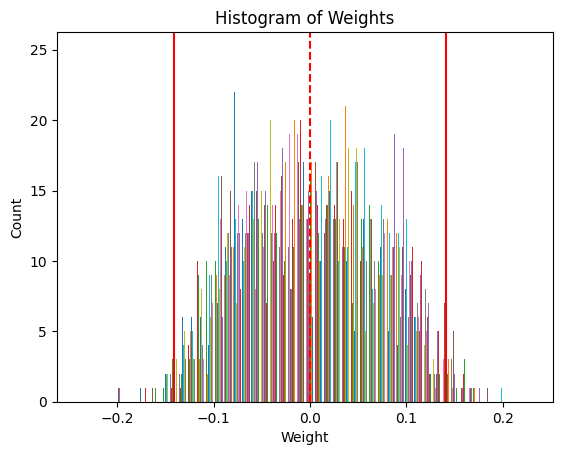

In [54]:
import matplotlib.pyplot as plt
# Calculate the mean and standard deviation of the weights.
mean = np.mean(weights)
sigma = np.std(weights)

# Plot a histogram of the weights.
plt.hist(weights, bins=50)
plt.axvline(mean, color='red', linestyle='dashed')
plt.axvline(mean + 2*sigma, color='red')
plt.axvline(mean - 2*sigma, color='red')
plt.title('Histogram of Weights')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [55]:
weight = weights.T
weight

array([[ 0.00127275, -0.11215986,  0.04323347, ..., -0.06159275,
        -0.08439574, -0.03033643],
       [ 0.05131302, -0.07783021, -0.04175221, ...,  0.03900773,
        -0.0982898 , -0.06562097],
       [-0.00147909, -0.12530203, -0.02854278, ..., -0.066296  ,
         0.00248581, -0.05947883],
       ...,
       [-0.14921615,  0.03741878, -0.06020495, ...,  0.07466925,
        -0.08865632,  0.11288612],
       [ 0.09616346,  0.0274425 , -0.02004758, ...,  0.01028902,
         0.03265511,  0.01538865],
       [ 0.08765634,  0.0066474 , -0.00086555, ..., -0.10941084,
         0.08940075,  0.03549951]], dtype=float32)

In [56]:
weight.shape

(65, 324)

In [57]:
def Tweights(weight):
    num = []

    for i in range(weight.shape[0]):
        weight_mean = np.mean(weight[i,:])
        weight_std = np.std(weight[i,:])
        threshold = weight_mean + 1.2* weight_std
        nodes_with_weight_above_threshold = np.sum(weight[i, :] > threshold)
        ten_percent_nodes = int(0.1 * weight.shape[1])
        if nodes_with_weight_above_threshold >= ten_percent_nodes:
            num.append(nodes_with_weight_above_threshold)
            print(i,nodes_with_weight_above_threshold,threshold)

    return num



In [58]:
 we= Tweights(weight)

0 37 0.08658392848446965
1 42 0.08833642899990081
2 43 0.08632145908195525
3 42 0.0793770344927907
4 42 0.08429794837720692
5 39 0.08970424951985478
6 49 0.08650095416232943
7 36 0.08643092224374413
8 43 0.07609979650005698
9 44 0.08369954153895377
10 45 0.07492017038166522
11 40 0.08520314968191087
12 39 0.08157271994277834
13 45 0.08377934804702818
14 51 0.08097567241638899
15 38 0.08956320222350768
16 41 0.0877959979698062
17 41 0.0898164969868958
18 39 0.08829353265464306
19 42 0.08652060693129897
20 47 0.08270304729230701
21 37 0.0872391493525356
22 49 0.08647419759072363
23 42 0.08613857922609895
24 38 0.08916102410294115
25 40 0.0911186090670526
26 34 0.08671816252171993
27 40 0.08578305821865796
28 36 0.08144731442444027
29 45 0.08059023502282799
30 45 0.08513910403707996
31 44 0.07282884335145354
32 40 0.0842967071570456
33 41 0.08363295448943972
34 46 0.08723306290339679
35 40 0.08809143491089344
36 49 0.07383367996662855
37 39 0.0852260900195688
38 48 0.08440026752650738
39 

In [59]:
len(we)

65

In [60]:
pred = np.zeros((65,708))
for i in range(weight.shape[0]):
    weight_mean = np.mean(weight[i,:])
    weight_std = np.std(weight[i,:])
    threshold = weight_mean + 1.1* weight_std
    nodes_with_weight_above_threshold = np.sum(weight[i, :] > threshold)
    ten_percent_nodes = int(0.1 * weight.shape[1])
    if nodes_with_weight_above_threshold >= ten_percent_nodes:
        for h in range(input_data.shape[0]): 
            pred_i = 0
            for j in range(weight.shape[1]):
                weight_value = weight[i,j]
                if weight_value > threshold:
                    pp = np.sum(weight_value*input_data[h,j])
                    pred_i += pp
                    pred[i,h] = pred_i
                

print(pred)

[[-0.23722915 -0.15780775 -0.14059982 ...  0.25798136  0.38045881
  -0.06560328]
 [-0.24795135 -0.00856308 -0.11380545 ...  0.5271282   0.48975872
   0.14646183]
 [-0.35501641 -0.23388933 -0.29778153 ...  0.39542835  0.50728116
  -0.04602714]
 ...
 [-0.58456413  0.0098867  -0.23251956 ...  0.55625073  0.45869296
   0.13928073]
 [-0.39418327 -0.45218113 -0.48102348 ...  0.37411063  0.43853984
   0.05700656]
 [-0.37288871  0.11984747  0.01165197 ...  0.52861642  0.7626712
   0.02995085]]


In [61]:
number_of_zeros = np.count_nonzero( pred == 0)

In [62]:
number_of_zeros

0

In [63]:
pred.shape

(65, 708)

In [64]:
predd = pred[0,:].reshape(59,12)
predd

array([[-2.37229151e-01, -1.57807746e-01, -1.40599816e-01,
        -5.11455099e-01, -6.50499333e-01, -5.51987230e-01,
        -5.96347243e-01, -5.90756119e-01, -6.83408860e-01,
        -4.38468636e-01, -2.40771448e-01, -6.64369023e-01],
       [-2.76257436e-01, -8.17200745e-01, -4.23361760e-01,
        -4.03841862e-01, -4.27914923e-01, -5.13460084e-01,
        -7.01018871e-01, -5.32689801e-01, -7.08391562e-01,
        -7.44431155e-01, -6.04978268e-01, -4.77586038e-01],
       [-2.77611176e-01, -3.10794001e-01, -6.51097441e-01,
        -7.63087382e-01, -4.79461003e-01, -6.19038693e-01,
        -6.05586731e-01, -2.08812974e-01, -4.51287763e-01,
        -5.81527449e-01, -7.07856477e-01, -5.68463447e-01],
       [-4.20561853e-01, -7.66804954e-01, -6.83970402e-01,
        -4.32788214e-01, -3.92946243e-01, -5.45227570e-01,
        -6.24054404e-01, -7.56697346e-01, -5.66461780e-01,
        -3.82153528e-01, -5.05460880e-01, -7.48840824e-01],
       [-8.58448818e-01, -7.35131582e-01, -5.7573305

In [65]:
df = pd.read_csv("enso_index.csv")
df

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1958,28.33,28.24,28.27,28.27,28.31,27.99,27.32,26.85,26.40,26.45,26.75,26.62
1,1959,27.07,27.18,27.47,27.88,27.70,27.37,26.44,26.09,25.92,26.24,26.04,26.18
2,1960,26.27,26.29,26.98,27.49,27.68,27.24,26.88,26.70,26.44,26.22,26.26,26.22
3,1961,26.23,26.56,26.94,27.36,27.75,27.67,26.89,26.19,25.78,25.71,26.07,25.97
4,1962,25.96,26.19,26.80,27.13,27.05,27.08,26.76,26.33,25.94,25.97,25.75,25.67
5,1963,25.77,26.22,27.18,27.78,27.63,27.62,27.78,27.48,27.40,27.36,27.47,27.62
6,1964,27.34,27.13,27.02,26.95,26.82,26.59,26.33,25.60,25.32,25.37,25.26,25.23
7,1965,25.66,26.19,26.94,27.38,27.99,28.09,27.90,27.97,28.01,28.17,28.12,27.96
8,1966,27.67,27.55,28.21,28.16,27.55,27.64,27.33,26.48,26.27,26.22,26.23,26.03
9,1967,25.88,26.11,26.50,26.74,27.35,27.47,26.97,26.44,25.86,25.97,26.08,25.95


In [66]:
df['avg'] = df[['jun', 'jul', 'aug', 'sep']].mean(axis=1)

In [67]:
df

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,avg
0,1958,28.33,28.24,28.27,28.27,28.31,27.99,27.32,26.85,26.40,26.45,26.75,26.62,27.1400
1,1959,27.07,27.18,27.47,27.88,27.70,27.37,26.44,26.09,25.92,26.24,26.04,26.18,26.4550
2,1960,26.27,26.29,26.98,27.49,27.68,27.24,26.88,26.70,26.44,26.22,26.26,26.22,26.8150
3,1961,26.23,26.56,26.94,27.36,27.75,27.67,26.89,26.19,25.78,25.71,26.07,25.97,26.6325
4,1962,25.96,26.19,26.80,27.13,27.05,27.08,26.76,26.33,25.94,25.97,25.75,25.67,26.5275
5,1963,25.77,26.22,27.18,27.78,27.63,27.62,27.78,27.48,27.40,27.36,27.47,27.62,27.5700
6,1964,27.34,27.13,27.02,26.95,26.82,26.59,26.33,25.60,25.32,25.37,25.26,25.23,25.9600
7,1965,25.66,26.19,26.94,27.38,27.99,28.09,27.90,27.97,28.01,28.17,28.12,27.96,27.9925
8,1966,27.67,27.55,28.21,28.16,27.55,27.64,27.33,26.48,26.27,26.22,26.23,26.03,26.9300
9,1967,25.88,26.11,26.50,26.74,27.35,27.47,26.97,26.44,25.86,25.97,26.08,25.95,26.6850


In [68]:
predd = pred[1,:].reshape(59,12)
        # Create year and month ranges
years = pd.date_range(start='1958', end='2016', freq='YS').year
months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
dff = pd.DataFrame(predd, index=years, columns=months)
dff = dff.reset_index()
dff['enso_avg'] = df['avg'].copy()

In [69]:
dff['June'][0]

-0.46596947591716353

In [70]:
dff

,index,January,February,March,April,May,June,July,August,September,October,November,December,enso_avg
0,1958,-0.247951,-0.008563,-0.113805,-0.176257,-0.406479,-0.465969,-0.539153,-0.552875,-0.819570,-0.707888,-0.337174,-0.436432,27.1400
1,1959,-0.324576,-0.854153,-0.579091,-0.103451,-0.224323,-0.575085,-0.698401,-0.569490,-0.745329,-0.505447,-0.620183,-0.812977,26.4550
2,1960,-0.263518,-0.355615,-0.746766,-0.666120,-0.586939,-0.717383,-0.636912,-0.392392,-0.655011,-0.680884,-0.709231,-0.549916,26.8150
3,1961,-0.440302,-0.933544,-0.682025,-0.331991,-0.481954,-0.507054,-0.682282,-0.751099,-0.659734,-0.759273,-0.941373,-0.972766,26.6325
4,1962,-0.934570,-0.929775,-0.653271,-1.034688,-1.020923,-0.841046,-1.017208,-0.671739,-0.902287,-0.818953,-0.499603,-0.848970,26.5275
5,1963,-0.965421,-0.758872,-0.572743,-0.511657,-0.752717,-0.652365,-0.733729,-0.465407,-0.550029,-0.763080,-0.875193,-0.560871,27.5700
6,1964,-0.815114,-0.839889,-0.645609,-0.768848,-0.868649,-0.928702,-0.788647,-0.438784,-0.855034,-0.907856,-0.766221,-0.946992,25.9600
7,1965,-0.958062,-0.685579,-0.868922,-0.924509,-0.758243,-0.771326,-0.630622,-0.724701,-0.559832,-0.648902,-0.278066,-0.441453,27.9925
8,1966,-0.723603,-0.400587,-0.443243,-0.341657,-0.775171,-0.617639,-0.484398,-0.738981,-0.786616,-1.131286,-0.724956,-0.477823,26.9300
9,1967,-0.796833,-1.008306,-1.134872,-1.019938,-0.620146,-0.737907,-0.837917,-0.631650,-0.518602,-0.934989,-0.833667,-0.686737,26.6850


In [71]:
dff.loc[-1] = [1957,0,0,0,0,0, dff['June'][0],dff['July'][0],dff['August'][0], dff['September'][0],dff['October'][0],dff['November'][0],dff['December'][0],dff['enso_avg'][0]]

dff.index = dff.index + 1  # shifting index
dff = dff.sort_index() 

In [72]:
dff

,index,January,February,March,April,May,June,July,August,September,October,November,December,enso_avg
0,1957.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.465969,-0.539153,-0.552875,-0.819570,-0.707888,-0.337174,-0.436432,27.1400
1,1958.0,-0.247951,-0.008563,-0.113805,-0.176257,-0.406479,-0.465969,-0.539153,-0.552875,-0.819570,-0.707888,-0.337174,-0.436432,27.1400
2,1959.0,-0.324576,-0.854153,-0.579091,-0.103451,-0.224323,-0.575085,-0.698401,-0.569490,-0.745329,-0.505447,-0.620183,-0.812977,26.4550
3,1960.0,-0.263518,-0.355615,-0.746766,-0.666120,-0.586939,-0.717383,-0.636912,-0.392392,-0.655011,-0.680884,-0.709231,-0.549916,26.8150
4,1961.0,-0.440302,-0.933544,-0.682025,-0.331991,-0.481954,-0.507054,-0.682282,-0.751099,-0.659734,-0.759273,-0.941373,-0.972766,26.6325
5,1962.0,-0.934570,-0.929775,-0.653271,-1.034688,-1.020923,-0.841046,-1.017208,-0.671739,-0.902287,-0.818953,-0.499603,-0.848970,26.5275
6,1963.0,-0.965421,-0.758872,-0.572743,-0.511657,-0.752717,-0.652365,-0.733729,-0.465407,-0.550029,-0.763080,-0.875193,-0.560871,27.5700
7,1964.0,-0.815114,-0.839889,-0.645609,-0.768848,-0.868649,-0.928702,-0.788647,-0.438784,-0.855034,-0.907856,-0.766221,-0.946992,25.9600
8,1965.0,-0.958062,-0.685579,-0.868922,-0.924509,-0.758243,-0.771326,-0.630622,-0.724701,-0.559832,-0.648902,-0.278066,-0.441453,27.9925
9,1966.0,-0.723603,-0.400587,-0.443243,-0.341657,-0.775171,-0.617639,-0.484398,-0.738981,-0.786616,-1.131286,-0.724956,-0.477823,26.9300


In [73]:
dff = dff.drop('index',axis=1)

In [74]:
def potential_predictors_new(data):
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 6:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='pearson')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index

        print(i,highest_correlation,highest_correlation_index,abs(highest_correlation))
        

In [75]:
potential_predictors_new(pred)

0 -0.19498021633565982 March 0.19498021633565982
1 0.19312916797956567 May 0.19312916797956567
2 0.22024690030008595 November 0.22024690030008595
3 -0.2184663752563198 April 0.2184663752563198
4 0.20052825101284738 November 0.20052825101284738
5 -0.20414755940745577 April 0.20414755940745577
6 0.1705366324552369 September 0.1705366324552369
7 0.16934934707546642 December 0.16934934707546642
8 -0.17088608369405586 April 0.17088608369405586
9 -0.17185207991245122 April 0.17185207991245122
10 0.20116139612824335 February 0.20116139612824335
11 0.14073572806721632 November 0.14073572806721632
12 0.25793730569598244 November 0.25793730569598244
13 0.19897396660326616 May 0.19897396660326616
14 -0.2059563873368704 April 0.2059563873368704
15 -0.18111350617892227 April 0.18111350617892227
16 0.19440513630100614 August 0.19440513630100614
17 0.2651730578215216 November 0.2651730578215216
18 0.14562064951562587 November 0.14562064951562587
19 0.15353409374453386 May 0.15353409374453386
20 -0.25

In [76]:
dff

,January,February,March,April,May,June,July,August,September,October,November,December,enso_avg
0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.465969,-0.539153,-0.552875,-0.819570,-0.707888,-0.337174,-0.436432,27.1400
1,-0.247951,-0.008563,-0.113805,-0.176257,-0.406479,-0.465969,-0.539153,-0.552875,-0.819570,-0.707888,-0.337174,-0.436432,27.1400
2,-0.324576,-0.854153,-0.579091,-0.103451,-0.224323,-0.575085,-0.698401,-0.569490,-0.745329,-0.505447,-0.620183,-0.812977,26.4550
3,-0.263518,-0.355615,-0.746766,-0.666120,-0.586939,-0.717383,-0.636912,-0.392392,-0.655011,-0.680884,-0.709231,-0.549916,26.8150
4,-0.440302,-0.933544,-0.682025,-0.331991,-0.481954,-0.507054,-0.682282,-0.751099,-0.659734,-0.759273,-0.941373,-0.972766,26.6325
5,-0.934570,-0.929775,-0.653271,-1.034688,-1.020923,-0.841046,-1.017208,-0.671739,-0.902287,-0.818953,-0.499603,-0.848970,26.5275
6,-0.965421,-0.758872,-0.572743,-0.511657,-0.752717,-0.652365,-0.733729,-0.465407,-0.550029,-0.763080,-0.875193,-0.560871,27.5700
7,-0.815114,-0.839889,-0.645609,-0.768848,-0.868649,-0.928702,-0.788647,-0.438784,-0.855034,-0.907856,-0.766221,-0.946992,25.9600
8,-0.958062,-0.685579,-0.868922,-0.924509,-0.758243,-0.771326,-0.630622,-0.724701,-0.559832,-0.648902,-0.278066,-0.441453,27.9925
9,-0.723603,-0.400587,-0.443243,-0.341657,-0.775171,-0.617639,-0.484398,-0.738981,-0.786616,-1.131286,-0.724956,-0.477823,26.9300


In [77]:
df_6 = dff.iloc[1:, :5]

In [78]:
df_6 = df_6.reset_index()

In [79]:
df_6

,index,January,February,March,April,May
0,1,-0.247951,-0.008563,-0.113805,-0.176257,-0.406479
1,2,-0.324576,-0.854153,-0.579091,-0.103451,-0.224323
2,3,-0.263518,-0.355615,-0.746766,-0.666120,-0.586939
3,4,-0.440302,-0.933544,-0.682025,-0.331991,-0.481954
4,5,-0.934570,-0.929775,-0.653271,-1.034688,-1.020923
5,6,-0.965421,-0.758872,-0.572743,-0.511657,-0.752717
6,7,-0.815114,-0.839889,-0.645609,-0.768848,-0.868649
7,8,-0.958062,-0.685579,-0.868922,-0.924509,-0.758243
8,9,-0.723603,-0.400587,-0.443243,-0.341657,-0.775171
9,10,-0.796833,-1.008306,-1.134872,-1.019938,-0.620146


In [80]:
df_12 = dff.iloc[0:-1, 6:12]

In [81]:
df_12 = df_12.reset_index()

In [82]:
df_12

,index,July,August,September,October,November,December
0,0,-0.539153,-0.552875,-0.819570,-0.707888,-0.337174,-0.436432
1,1,-0.539153,-0.552875,-0.819570,-0.707888,-0.337174,-0.436432
2,2,-0.698401,-0.569490,-0.745329,-0.505447,-0.620183,-0.812977
3,3,-0.636912,-0.392392,-0.655011,-0.680884,-0.709231,-0.549916
4,4,-0.682282,-0.751099,-0.659734,-0.759273,-0.941373,-0.972766
5,5,-1.017208,-0.671739,-0.902287,-0.818953,-0.499603,-0.848970
6,6,-0.733729,-0.465407,-0.550029,-0.763080,-0.875193,-0.560871
7,7,-0.788647,-0.438784,-0.855034,-0.907856,-0.766221,-0.946992
8,8,-0.630622,-0.724701,-0.559832,-0.648902,-0.278066,-0.441453
9,9,-0.484398,-0.738981,-0.786616,-1.131286,-0.724956,-0.477823


In [83]:
df_13 = dff.iloc[1:, [12]]

In [84]:
df_13 = df_13.reset_index()

In [85]:
df_13

,index,enso_avg
0,1,27.1400
1,2,26.4550
2,3,26.8150
3,4,26.6325
4,5,26.5275
5,6,27.5700
6,7,25.9600
7,8,27.9925
8,9,26.9300
9,10,26.6850


In [86]:
df_last = pd.concat([df_6, df_12, df_13], axis=1)

In [87]:
df_last = df_last.drop('index',axis=1)

In [88]:
correlation_ = df_last.corr(method='pearson')
second_max_value_ = correlation_['enso_avg'].sort_values(ascending=False)[1]
second_max_index_ = correlation_['enso_avg'].sort_values(ascending=False).index[1]
print(second_max_index_,second_max_value_)

May 0.19312916797956567


In [89]:
correlation_

,January,February,March,April,May,July,August,September,October,November,December,enso_avg
January,1.000000,0.685224,0.604782,0.526730,0.655868,0.389001,0.372831,0.448797,0.586717,0.501894,0.760596,0.084318
February,0.685224,1.000000,0.793969,0.607022,0.649540,0.571291,0.578711,0.545010,0.669215,0.652623,0.674184,0.087763
March,0.604782,0.793969,1.000000,0.694961,0.629777,0.645176,0.588870,0.549842,0.657784,0.629010,0.586299,-0.002964
April,0.526730,0.607022,0.694961,1.000000,0.742390,0.595830,0.539503,0.448106,0.608472,0.582124,0.537190,-0.100842
May,0.655868,0.649540,0.629777,0.742390,1.000000,0.574121,0.601487,0.544427,0.621411,0.577262,0.653352,0.193129
July,0.389001,0.571291,0.645176,0.595830,0.574121,1.000000,0.771828,0.719365,0.683263,0.586329,0.546745,-0.076435
August,0.372831,0.578711,0.588870,0.539503,0.601487,0.771828,1.000000,0.800761,0.766358,0.608235,0.534499,0.105664
September,0.448797,0.545010,0.549842,0.448106,0.544427,0.719365,0.800761,1.000000,0.790928,0.582182,0.589108,0.078343
October,0.586717,0.669215,0.657784,0.608472,0.621411,0.683263,0.766358,0.790928,1.000000,0.764002,0.675879,0.009829
November,0.501894,0.652623,0.629010,0.582124,0.577262,0.586329,0.608235,0.582182,0.764002,1.000000,0.727810,0.111923
